# Day 08. Exercise 00
# Binary classifier. Logistic regression

## 0. Imports

In [2]:
import os

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression # pip3 install scikit-learn
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import accuracy_score

## 1. Preprocessing

- Get the data from the file [`checker-timestamp.csv`](https://drive.google.com/file/d/1pooM4cITtG249msX3GK_6W0eEiblzAf5/view?usp=sharing).


- Create a dataframe `df` with the columns: `date`, `am`, `pm`, `target`, where `date` is the date of the day, `am` is the number of the commits during the day before midday (integer), `pm` is the number of commits during the day after midday (integer), `target` is weekend/working_day.

In [3]:
df = pd.read_csv("../data/checker_timestamp.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3207 entries, 0 to 3206
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   timestamp  3207 non-null   object
dtypes: object(1)
memory usage: 25.2+ KB


In [4]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3207 entries, 0 to 3206
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  3207 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 25.2 KB


In [5]:
df['date'] = df['timestamp'].dt.date

df['hour'] = df['timestamp'].dt.hour

In [6]:
df['period'] = df['hour'].apply(lambda h: 'am' if h < 12 else 'pm')

df_counts = df.groupby(['date', 'period']).size().unstack(fill_value=0)

df_counts = df_counts.rename(columns={'am': 'am', 'pm': 'pm'})


In [7]:
df_counts['weekday'] = pd.to_datetime(df_counts.index).weekday

df_counts['target'] = df_counts['weekday'].apply(
    lambda x: 'weekend' if x >= 5 else 'working_day'
)

In [8]:
df = df_counts.reset_index()[['date', 'am', 'pm', 'target']]
df.head()

period,date,am,pm,target
0,2020-04-17,21,2,working_day
1,2020-04-18,1,68,weekend
2,2020-04-19,18,15,weekend
3,2020-04-20,2,23,working_day
4,2020-04-21,0,25,working_day


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    35 non-null     object
 1   am      35 non-null     int64 
 2   pm      35 non-null     int64 
 3   target  35 non-null     object
dtypes: int64(2), object(2)
memory usage: 1.2+ KB


## 2. Exploratory analysis

- Create a plot where `x` is am, `y` is pm, each dot is a day, working days and weekends must have different colors.


- By looking at the graph do you think it will be easy to classify the days having those two features? Put your answer in the markdown cell in the end of that sectioin: "yes, it is easy" or "no, it is not easy".

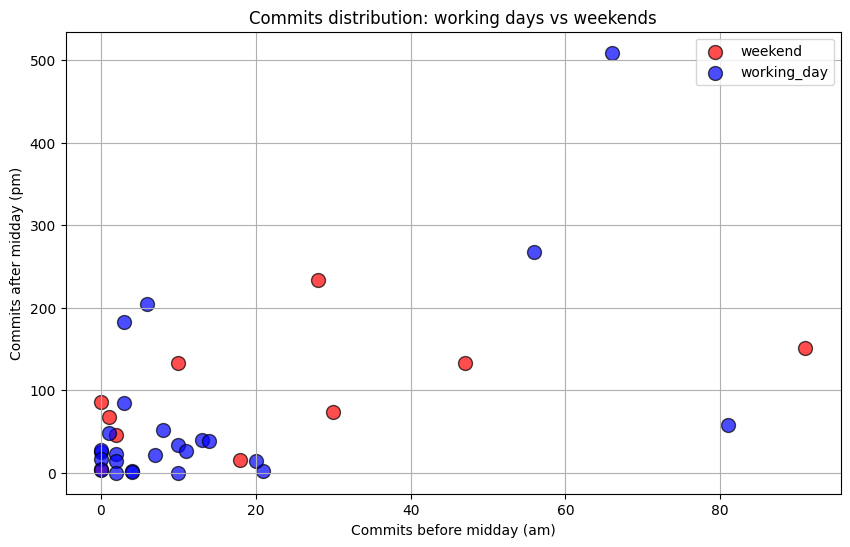

In [10]:
colors = {'working_day': 'blue', 'weekend': 'red'}

plt.figure(figsize=(10, 6))
for target, group in df.groupby('target'):
    plt.scatter(
        group['am'], group['pm'],
        c=colors[target],
        label=target,
        s=100, alpha=0.7, edgecolors='k'
    )

plt.xlabel('Commits before midday (am)')
plt.ylabel('Commits after midday (pm)')
plt.title('Commits distribution: working days vs weekends')
plt.legend()
plt.grid(True)
plt.show()

By looking at the graph do you think it will be easy to classify the days having those two features?

**Answer**: **no**

## 3. Logistic regression

- Train logistic regression on your data using `am` and `pm`, parameters are: `random state=21`, `fit_intercept=False`.


- Make predictions for every day of your dataset and add them to your dataframe with the column name `predict`.


- Save the dataframe into a file in the subfolder of the day `data` with the name `am_pm.csv`.


- Draw another plot like you did before, but the color should be taken from the `predict`.


- By looking at the graph do you think if it made good predictions? Put your answer in the markdown cell in the end of that section: "yes, it is good"; "no, it is not good".

In [11]:
X = df[['am', 'pm']]

le = LabelEncoder()
y = le.fit_transform(df['target'])

In [12]:
model = LogisticRegression(random_state=21, fit_intercept=False)
model.fit(X, y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,False
,intercept_scaling,1
,class_weight,None
,random_state,21
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [13]:
df['predict'] = model.predict(X)

df['predict'] = le.inverse_transform(df['predict'])

In [14]:
os.makedirs("day", exist_ok=True)
df.to_csv("day/am_pm.csv", index=False)

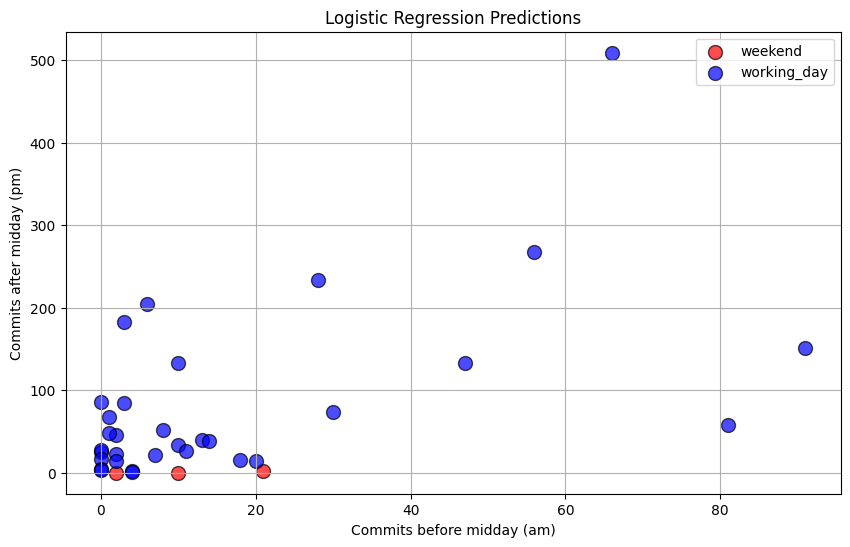

In [15]:
plt.figure(figsize=(10, 6))
colors = {'working_day': 'blue', 'weekend': 'red'}

for pred, group in df.groupby('predict'):
    plt.scatter(
        group['am'], group['pm'],
        c=colors[pred],
        label=pred,
        s=100, alpha=0.7, edgecolors='k'
    )

plt.xlabel('Commits before midday (am)')
plt.ylabel('Commits after midday (pm)')
plt.title('Logistic Regression Predictions')
plt.legend()
plt.grid(True)
plt.show()

By looking at the graph do you think if it made good predictions?

**Answer**: **no**


## 4. Evaluation

- Calculate `accuracy` for your predictions.


- Calculate `accuracy` for the naive case when each of your prediction is the value of your most popular class of the day.


- Comparing the accuracies do you think that the classifier made good predictions? Put your answer in the markdown cell in the end of the secion: "yes, it is good"; "no, it is not good".

In [16]:
acc_model = accuracy_score(df['target'], df['predict'])
print("Model accuracy:", acc_model)

Model accuracy: 0.6285714285714286


In [17]:
most_common = df['target'].mode()[0]

naive_preds = [most_common] * len(df)

acc_naive = accuracy_score(df['target'], naive_preds)
print("Naive baseline accuracy:", acc_naive)


Naive baseline accuracy: 0.7142857142857143


Comparing the accuracies do you think that the classifier made good predictions?

**Answer**: **no**